# Initialization

Interactive use of the `sc_qubits` library from a jupyter notebook starts with importing the `sc_qubits` library. Additional imports, e.g.,  `numpy` and the QuTiP library are optional.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import sc_qubits as qubit
import sc_qubits.utils.plotting as plot


import numpy as np
from qutip import *

C:\Users\drjen\Miniconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Fluxonium qubit

$H_\text{fl}=-4E_\text{C}\partial_\phi^2-E_\text{J}\cos(\phi-\varphi_\text{ext}) +\frac{1}{2}E_L\phi^2$

In [14]:
fluxonium = qubit.Fluxonium(
    EJ = 8.9,
    EC = 2.5,
    EL = 0.5,
    flux = 0.33,
    cutoff = 110
)

In [15]:
fluxonium

Fluxonium qubit
 ———— PARAMETERS ————
truncated_dim	: None
flux	: 0.33
EJ	: 8.9
cutoff	: 110
EL	: 0.5
EC	: 2.5
Hilbert space dimension	: 110

In [16]:
fluxonium.eigenvals()

array([-3.30851586, -0.23733983,  6.9133453 , 10.55323546, 11.76215604,
       16.12300682])


[====================] 100% Done.


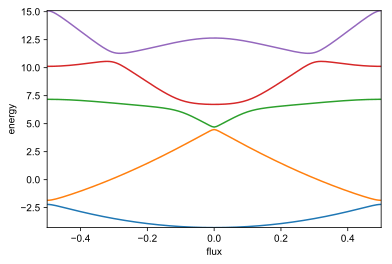

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2147f8bd6d8>)

In [17]:
flux_list = np.linspace(-0.5, 0.5, 151)
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=5)


[====================] 100% Done.


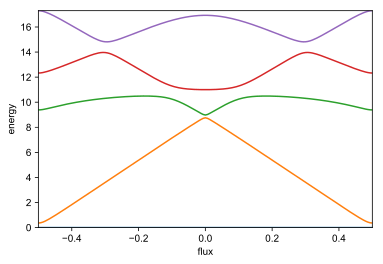

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2140142a6d8>)

In [18]:
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=True)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x214014529e8>)

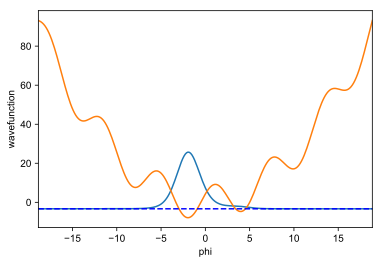

In [19]:
fluxonium.plot_wavefunction(esys=None, which=0, mode='real')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x214014a40b8>)

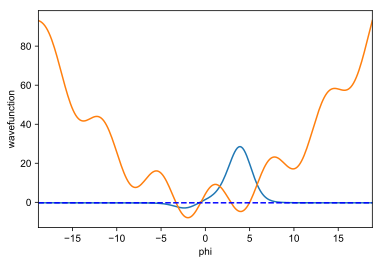

In [20]:
fluxonium.plot_wavefunction(esys=None, which=1, mode='real')

### Matrix elements

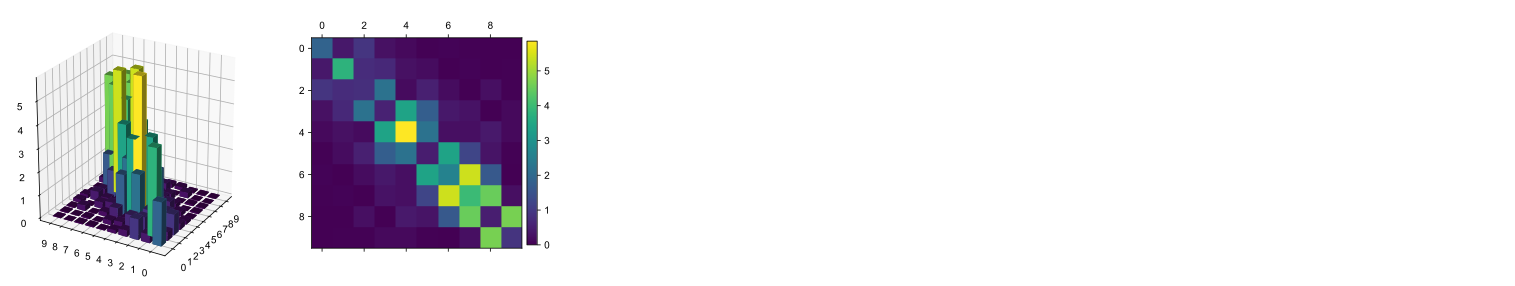

(<Figure size 720x360 with 3 Axes>,
 (<matplotlib.axes._subplots.Axes3DSubplot at 0x214014e0080>,
  <matplotlib.axes._subplots.AxesSubplot at 0x214014f7f28>))

In [21]:
phimat = fluxonium.matrixelement_table('phi_operator', esys=None, evals_count=10)
plot.matrix(phimat)

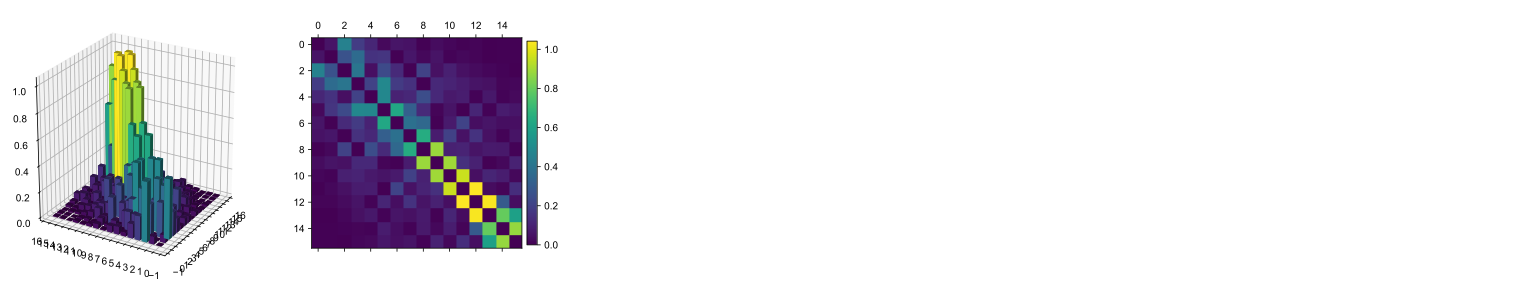

(<Figure size 720x360 with 3 Axes>,
 (<matplotlib.axes._subplots.Axes3DSubplot at 0x214014e0f98>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2147f533be0>))

In [22]:
fluxonium.plot_matrixelements('n_operator', evals_count=16)